In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [67]:
# 1. Завантажте файл Housing.csv. Виведіть перші 5 рядків.
data = pd.read_csv("Housing.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [68]:
# 2. Зробіть новий датасет, який містить тільки ці стовпчики. 
norm = data.copy()

columns = ['price', 'area', 'bedrooms', 'bathrooms']
norm = norm[columns]

In [69]:
# 3. Проведіть попередній аналіз даних: вивчіть структуру даних, перевірте наявність відсутніх значень та інші особливості даних. 
#Зробити це  по аналогії з попередніми роботами (визначити тип даних, перевірити наявність “-“, замінити на Nan, потім змінити тип даних на float, потім на середнє значення за стовпчиком.
num_of_rows, numb_of_columns = norm.shape
print(f"Кількість рядків: {num_of_rows}, Кількість стовпчиків: {numb_of_columns}")

missing_values = norm.isna().sum()
data.fillna(value="NaN")
analized_data = norm
for i in range(0, numb_of_columns):
    try:
        analized_data.iloc[:i]-norm.iloc[:i].astype(float).fillna(norm.iloc[:i].mean)
    except:
        continue
analized_data
print(f"Кількість пропусків у датасеті: {missing_values.max()} ")
analized_data.fillna(analized_data.mean(), inplace=True)
print(analized_data.dtypes)
analized_data


Кількість рядків: 545, Кількість стовпчиків: 4
Кількість пропусків у датасеті: 0 
price        int64
area         int64
bedrooms     int64
bathrooms    int64
dtype: object


,price,area,bedrooms,bathrooms
0,13300000,7420,4,2
1,12250000,8960,4,4
2,12250000,9960,3,2
3,12215000,7500,4,2
4,11410000,7420,4,1
...,...,...,...,...
540,1820000,3000,2,1
541,1767150,2400,3,1
542,1750000,3620,2,1
543,1750000,2910,3,1


In [70]:
# 4. Нормалізуйте дані перед подальшим використанням. Це може покращити швидкість навчання моделі та поліпшити її стабільність. Дані для лінійної регресії нормалізуються так, щоб їх середнє значення було близьким до 0, а стандартне відхилення - близьким до 1. 

for column in columns[1:]:
    analized_data[column] = (data[column] - data[column].mean()) / data[column].std()
analized_data.head()


,price,area,bedrooms,bathrooms
0,13300000,1.045766,1.402131,1.420507
1,12250000,1.755397,1.402131,5.400847
2,12250000,2.216196,0.047235,1.420507
3,12215000,1.082630,1.402131,1.420507
4,11410000,1.045766,1.402131,-0.569663


In [71]:
# 5. Підготуйте дані: виберіть атрибути (площа, кількість ванних кімнат, кількість спалень) та цільову змінну (ціну на будинок).
X = analized_data[['area', 'bathrooms', 'bedrooms']].values
Y = analized_data['price'].values

In [72]:
# 6. Розділіть дані на навчальний та тестовий набори для подальшого оцінювання моделі. 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42 )

In [73]:
# 7. Побудуйте модель лінійної регресії та навчіть її на навчальних даних. 
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [74]:
# 8. Оцініть якість моделі на тестових даних, використовуючи показники, такі як середньоквадратична помилка (RMSE) та коефіцієнт детермінації 
#Потім застосуйте  крос-валідацію для підвищення якості моделі. Порівняйте результати (без крос-валідації і з крос-валідацією). 
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Середньоквадратична помилка: {np.sqrt(mse)}")
print(f"Коефіцієнт детермінації: {r2}")

cv_scores = cross_val_score(model, X_train, Y_train, cv=5) 
print(f"Визначене крос-валідацією: {np.mean(cv_scores)} ")
#print(f"Cтандартне відхилення оцінок: {cv_scores.std()} ")

Середньоквадратична помилка: 1658324.6001036868
Коефіцієнт детермінації: 0.4559299118872444
Визначене крос-валідацією: 0.45481563115186374 


In [75]:
# 9. Виконайте аналіз результатів та виведіть прогнозовані ціни на будинки для тестового набору даних. 
for i in range(len(Y_pred)):
    print(f" Актуальна ціна: {Y_test[i]}, Прогнозована ціна: {Y_pred[i]}")

 Актуальна ціна: 4060000, Прогнозована ціна: 6383168.059811919
 Актуальна ціна: 6650000, Прогнозована ціна: 6230250.351404279
 Актуальна ціна: 3710000, Прогнозована ціна: 3597885.280900909
 Актуальна ціна: 6440000, Прогнозована ціна: 4289730.838638201
 Актуальна ціна: 2800000, Прогнозована ціна: 3930445.6057517664
 Актуальна ціна: 4900000, Прогнозована ціна: 4883933.33918115
 Актуальна ціна: 5250000, Прогнозована ціна: 5505773.165330749
 Актуальна ціна: 4543000, Прогнозована ціна: 6068793.481036289
 Актуальна ціна: 2450000, Прогнозована ціна: 3321512.0248344205
 Актуальна ціна: 3353000, Прогнозована ціна: 3495157.727447048
 Актуальна ціна: 10150000, Прогнозована ціна: 8731338.125276066
 Актуальна ціна: 2660000, Прогнозована ціна: 3561265.8244720995
 Актуальна ціна: 3360000, Прогнозована ціна: 3487335.9784743134
 Актуальна ціна: 3360000, Прогнозована ціна: 3633344.355480292
 Актуальна ціна: 2275000, Прогнозована ціна: 3933900.271452598
 Актуальна ціна: 2660000, Прогнозована ціна: 666108

In [76]:
# 8. Визначте аналітично коефіцієнти лінійної регресії (ваги моделі) для цієї задачі, використовуючи формулу для спрощеного аналітичного рішення лінійної регресії.
X_train_analytical = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
coef_analytical = np.linalg.inv(X_train_analytical.T.dot(X_train_analytical)).dot(X_train_analytical.T).dot(Y_train)
intercept_analytical = coef_analytical[0]
coefs_analytical = coef_analytical[1:]

print("Коефіцієнти лінійної регресії (аналітичний метод):")
print(f"Intercept: {intercept_analytical}")
for i, coef in enumerate(coefs_analytical):
    print(f"Коефіцієнт для ознаки {i + 1}: {coef}")

Коефіцієнти лінійної регресії (аналітичний метод):
Intercept: 4736303.161529642
Коефіцієнт для ознаки 1: 749711.1756427705
Коефіцієнт для ознаки 2: 714672.4122800202
Коефіцієнт для ознаки 3: 265848.86846439913


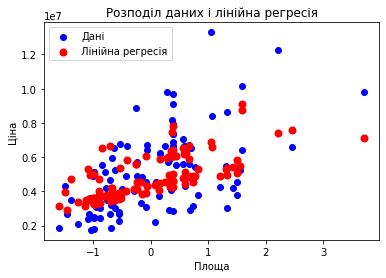

In [77]:
# 9. Візуалізуйте дані та результати регресії: побудуйте графіки для ознайомлення з розподілом даних і лінійною регресійною моделлю. 

plt.scatter(X_test[:, 0], Y_test, color='blue', label='Дані')
plt.xlabel('Площа')
plt.ylabel('Ціна')
plt.title('Розподіл даних і лінійна регресія')
plt.legend()
plt.scatter(X_test[:, 0], Y_pred, color='red', linewidth=2, label='Лінійна регресія')
plt.legend()

plt.show()

In [78]:
# 10. Порівняйте отримані параметри (коефіцієнти) лінійної регресії з аналітичними результатами та оцініть, наскільки схожі вони.
print("Коефіцієнти лінійної регресії (аналітичний метод):")
print(f"Intercept: {intercept_analytical}")
for i, coef in enumerate(coefs_analytical):
    print(f"Коефіцієнт для ознаки {i + 1}: {coef}")

print("Коефіцієнти лінійної регресії (метод машинного навчання, scikit-learn):")
print(f"Intercept: {model.intercept_}")
for i, coef in enumerate(model.coef_):
    print(f"Коефіцієнт для ознаки {i + 1}: {coef}")

Коефіцієнти лінійної регресії (аналітичний метод):
Intercept: 4736303.161529642
Коефіцієнт для ознаки 1: 749711.1756427705
Коефіцієнт для ознаки 2: 714672.4122800202
Коефіцієнт для ознаки 3: 265848.86846439913
Коефіцієнти лінійної регресії (метод машинного навчання, scikit-learn):
Intercept: 4736303.161529644
Коефіцієнт для ознаки 1: 749711.1756427698
Коефіцієнт для ознаки 2: 714672.412280025
Коефіцієнт для ознаки 3: 265848.86846439727


In [79]:
# 11.Зробіть висновки щодо ефективності лінійної регресії у прогнозуванні цін на будинок на основі вказаних атрибутів та порівняння з аналітичним рішенням.
# Аналітичні результати і метод машинного навчання співпадають.
# На навчальних даних були розраховані показники якості моделі. Середньоквадратична помилка (RMSE) і коефіцієнт детермінації (R^2) були використані для оцінки. Вони допомагають визначити точність та узгодженість моделі.
# Оцінки якості моделі важливі для розуміння її ефективності. Чим ближче значення RMSE до нуля і R^2 до 1, тим краще.
# Отже, лінійна регресія виявилася ефективною для прогнозування цін на будинок. Обидва методи надали схожі результати, і показники якості моделі свідчать про її здатність до прогнозування цін на будинок з заданою точністю. 

In [ ]:
# Висновок: у цій практичній роботі я навчився розробляти модель лінійної регресії, оцінювати якість моделі на тестових даних, знаходити середньоквадратичну помилку та коефіцієнт детермінації та застосовувати крос-валідацію